In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)
from map.map import Map
from scenario.scenario import Scenario
import numpy as np
import random
from time import time
from common.constants.constants import DEFAULT_EMPTY_VALUE
from common.enums.enum import GateTypes
import multiprocessing as mp

In [2]:
input_name = "1 vs 7 default.aoe2scenario"
output_name = "0_BASIC_SCENARIO.aoe2scenario"

In [3]:
# start_time = time()
# # result = np.array(lst)
# lst = np.array(lst)
# end_time = time()
# print(end_time-start_time)

In [4]:
map_size = 350
map = Map(map_size)
new_zones = map.voronoi(150,
            [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            [DEFAULT_EMPTY_VALUE, DEFAULT_EMPTY_VALUE, DEFAULT_EMPTY_VALUE, DEFAULT_EMPTY_VALUE])

keys = list(map.get_map_layer(MapLayerType.UNIT).dict.keys())

for city_zone in keys:
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
        [city_zone, city_zone, city_zone,city_zone],
        TerrainId.ROAD_FUNGUS,
        margin = 2,
        )

In [5]:
processes = []

In [6]:
def build_city(zone, player_id):
    """
    Build city in zone
    """
    print("BUILD CITY")

    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.GRASS_2,
        margin = 17
        )

    map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, (TerrainId.GRASS_2, PlayerId.GAIA), zone, zone],
            player_id = player_id,
        )

    map.place_template(
            'walls.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )
    
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.ROAD_FUNGUS,
        margin = 1
        )
    
    city_zones = map.voronoi(35,
                [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
                [zone, zone, zone, zone],
            )
    
    for city_zone in city_zones:
        map.add_borders(
            [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
            [city_zone, city_zone, city_zone, city_zone],
            TerrainId.ROAD_FUNGUS,
            margin = 1
            )
        
        map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
        )

        map.place_template(
            'City.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
            player_id = player_id,
        )

In [7]:
def build_snow_forest(zone, player_id):
    """
    Build snow forest in zone
    """
    print("BUILD FOREST")
    
    map.place_template(
            'snow_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )

In [8]:
for i in range(350):
    for j in range(350):
        None

In [9]:
counter = 0
for i, zone in enumerate(new_zones):
    # print(zone)
    counter += 1
    if counter >= 9:
        counter = 1
    
    if random.random() > 0.5:
        build_city(zone, PlayerId(counter))
    else:
        build_snow_forest(zone, PlayerId(counter))

        
        

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
NEW TEMPLATE LOADED: walls.yaml
NEW TEMPLATE LOADED: City.yaml
BUILD FOREST
NEW TEMPLATE LOADED: snow_forest.yaml
BUILD FOREST
Longest call: ['place_groups', {'map_layer_type_list': [<MapLayerType.UNIT: 0>, <MapLayerType.TERRAIN: 1>, <MapLayerType.ZONE: 3>, <MapLayerType.DECOR: 2>], 'array_space_type_list': [(-3, <PlayerId.GAIA: 0>), (<TerrainId.SNOW: 32>, <PlayerId.GAIA: 0>), (-3, <PlayerId.GAIA: 0>), (-3, <PlayerId.GAIA: 0>)], 'obj_type_list': [<OtherInfo.FORAGE_BUSH: (59, 6, -1, 16401, True)>], 'player_id': <PlayerId.GAIA: 0>, 'group_size': 5, 'groups_density': 5, 'clumping': 2, 'clumping_func': None, 'margin': 0, 'start_point': (-1, -1), 'ghost_margin': False, 'place_on_n_maps': 1}, 0.5625994205474854]
BUILD FOREST
BUILD CITY
Longest call: ['place_groups', {'map_layer_type_list': [<MapLayerType.UNIT: 0>, <MapLayerType.TERRAIN: 1>, <MapLayerType.ZONE: 3>, <MapLayerType.DECOR: 2>], 'array_space_type_list': [(-5, <PlayerId.GAIA: 0>), (<T

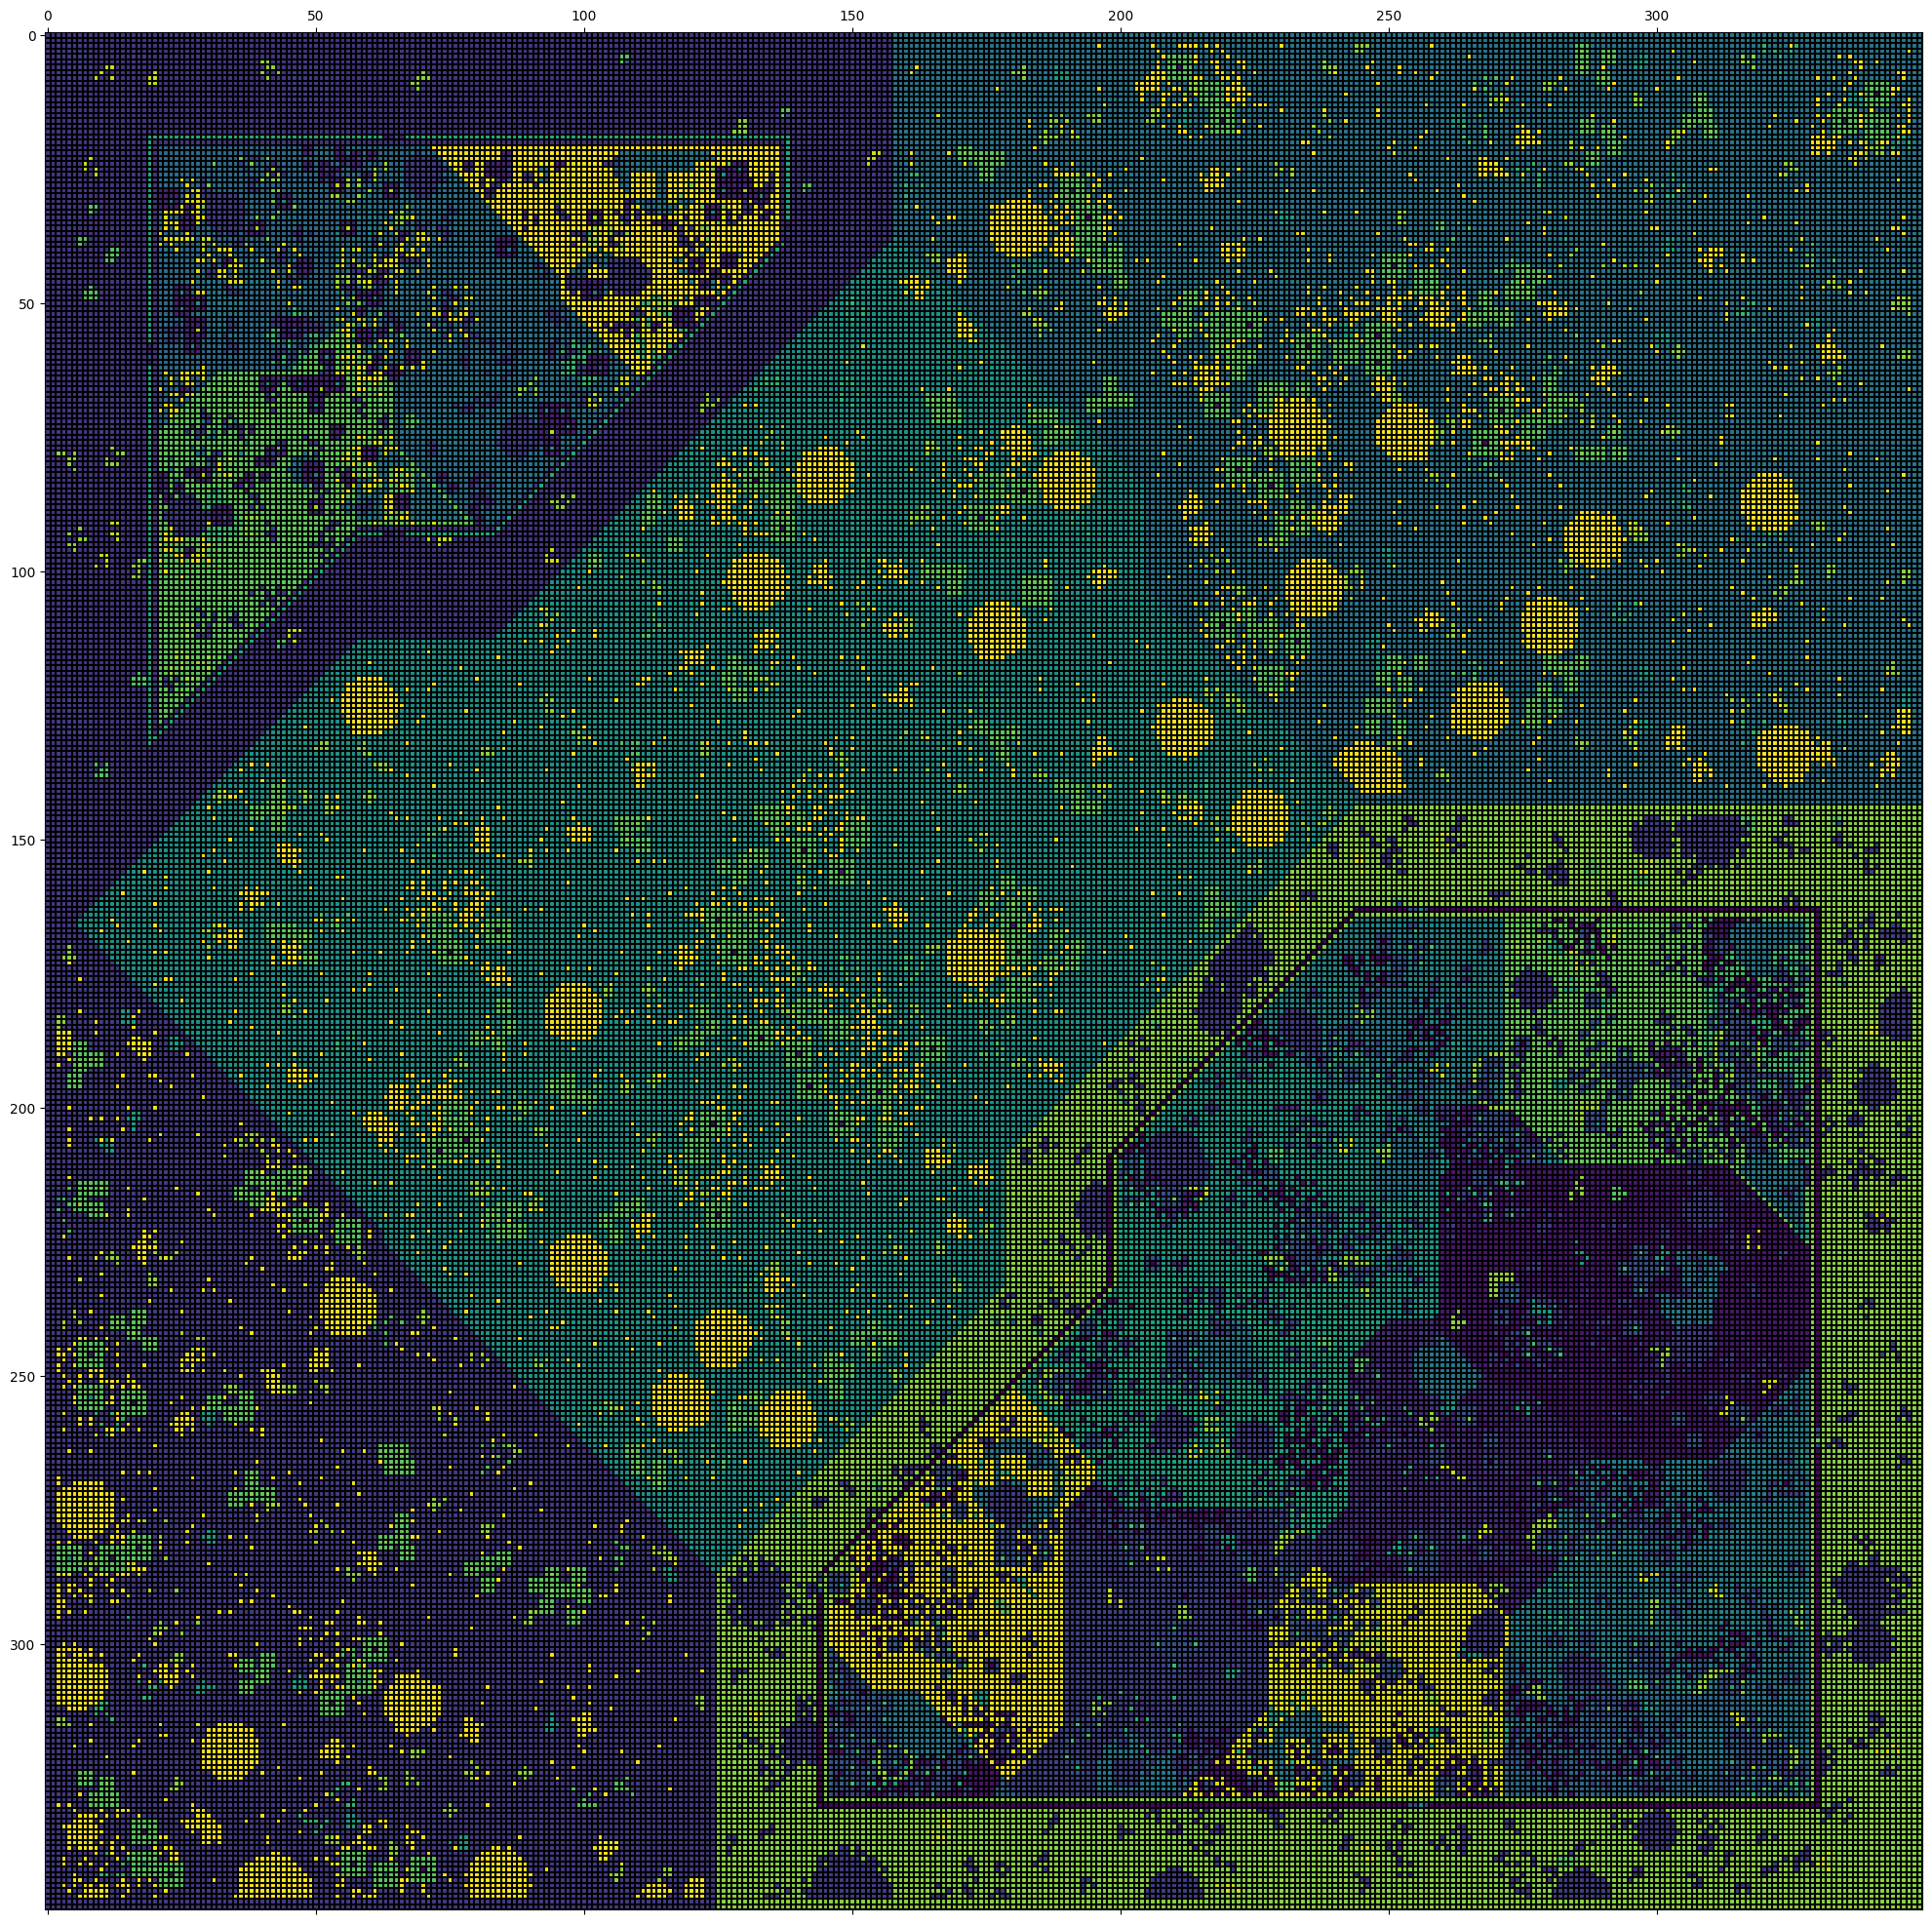

In [10]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)

In [11]:
scenario = Scenario(input_name, map)


Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\1 vs 7 default.aoe2scenario'
Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.47
##########################################

Loading scenario structure finished successfully.
Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	🔄 Gathering Map data...[Retriever] secondary_game_mode: [DataType] 1 * u8 (Default: 0) >>> set to: 13 (was: None)
[Retriever] secondary_game_mode1: [DataType] 1 * u8 (Default: 0) >>> set to: 240 (was: None)
[Retriever] secondary_game_mode2: [DataType] 1 * u8 (Default: 0) >>> set to: 173 (was: None)
[Retriever] secondary_game_mode3: [DataType]

In [12]:
scenario.change_map_size(map_size)
scenario.write_map()
scenario.save_file(output_name)


Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
Reconstruction finished successfully.

File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	🔄 Reconstructing Map...[Retriever] secondary_game_mode: [DataType] 1 * u8 (Default: 0) (Data: 13) retrieved: b'\r'
[Retriever] secondary_game_mode1: [DataType] 1 * u8 (Default: 0) (Data: 240) retrieved: b'\xf0'
[Retriever] secondary_game_mode2: [DataType] 1 * u8 (Default: 0) (Data: 173) retrieved: b'\xad'
[Retriever] secondary_game_mode3: [DataType] 1 * u8 (Default: 0) (Data: 222) retrieved: b'\xde'
	✔ Map
	✔ Uni